In [1]:
import numpy as np
import collections
import matplotlib.pylab as plt

In [4]:
import numpy as np
import pylab as pl

def calcular_vizinhos():
	for i in range(L):
		for j in range(L):
			# Vizinhança norte-sul
                        # Vizinhos da primeira linha
			if i == 0:
				# vizinho norte (contorno)
				V[i * L + j].append((L - 1) * L + j)  #(L - 1) ultima linha (ultimo seguimento de S) 
				# vizinho sul (padrão)
				V[i * L + j].append((i + 1) * L + j)  #(i+1) vai pra linha seguinte
			# vizinhos da ultima linha
			elif i == L - 1:
				# vizinho norte
				V[i * L + j].append((i - 1) * L + j)
				# vizinho sul (contorno)
				V[i * L + j].append(0 * L + j) 
			# vizinho norte-sul (padrão)
			else:
				# vizinho norte
				V[i * L + j].append((i - 1) * L + j)
				# vizinho sul
				V[i * L + j].append((i + 1) * L + j)



			# vizinhança leste-oeste
                        # Vizinhos da ultima coluna
			if j == L - 1:
                                # Vizinho leste (contorno)
				V[i * L + j].append(i * L + 0) # 0 é a primeira coluna
				# Vizinho oste (padrão)
				V[i * L + j].append(i * L + j - 1) #(j-1) coluna da esquerda
			# Vizinhos da primeira coluna
			elif j == 0:
                                #Vizinho oeste (contorno)
				V[i * L + j].append(i * L + (L - 1)) #(L-1) Ultima coluna
				# Vizinho leste (padrao)
				V[i * L + j].append(i * L + j + 1) # (j+1) coluna da direita
			# vizinho leste-oeste
			else:
				# vizinho leste (padrão)
				V[i * L + j].append(i * L + j + 1)
				# vizinho oeste (padrão)
				V[i * L + j].append(i * L + j - 1)

def flipar(um_spin):
    soma_vizinhanca = 0.
    for spin_vizinho in V[um_spin]:
        soma_vizinhanca += S[spin_vizinho]
    delta_energia = 2.0 * S[um_spin] * soma_vizinhanca    
    if delta_energia <= 0 or np.random.rand() < np.exp(-delta_energia / T):
        S[um_spin] *= -1
    
def setup(parametro_L, parametro_MCS, parametro_Maioria):
    # modo de referencia = S[linha * L + coluna]
    global S # rede com estrutura de dados linear
    global V # lista de vizinhos
    global L # Lado
    global MCS_steps #monte carlo steps
    L = parametro_L
    MCS_steps = parametro_MCS
    # rede com estrutura de dados linear
    S = np.random.random_integers(10, 13, size = L * L) # rede com estrutura de dados linear
    """
    abaixo estou criando diferentes cenários iniciais (como em Solé),
    fazendo um cenário 75% dos spin pra cima e depois 75% dos spins
    para baixo. Isso é feito em função do parametro_maioria, que define
    o indice da lista anterior 
    """
    S[S == 10] = [-1, 1, -1][parametro_Maioria]
    S[S == 11] = [-1, 1, -1][parametro_Maioria]
    S[S == 12] = [1, 1, -1][parametro_Maioria]
    S[S == 13] = [1, -1, 1][parametro_Maioria]
    V = [[] for i in range(L * L) ] # lista de vizinhos, cada spin tem inicialmente zero vizinhos
    calcular_vizinhos()

def run(parametro_T):
    global T
    T = parametro_T
    data_M_mean = []
    for i in range(MCS_steps):
        step()
        data_M_mean.append(np.mean(S))
    return data_M_mean

def step():
    MC_spins = np.random.randint(L * L, size = L * L) # sortear MCS spins
    for spin in MC_spins:
        flipar(spin)

def plot_random_walk():
    pl.plot(data_random_walk)
    pl.show()

/home/franca/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:66: DeprecationWarning: This function is deprecated. Please call randint(10, 13 + 1) instead


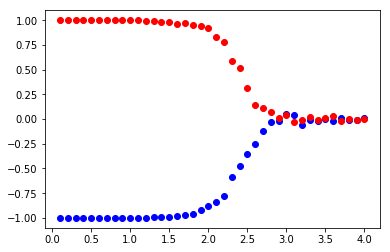

In [5]:
T_parameters = np.arange(0.1, 4.1, 0.1)
for maioria in [-1, 1]:   #loop para os diferentes condições iniciais
    data_simulations = [] #Lista que guardará a magnetização dos 5 ultimos períodos
    for t in T_parameters:#loop para diferentes temperaduras
        setup(parametro_L = 100, parametro_MCS = 50, parametro_Maioria = maioria)
        data = run(parametro_T = t)
        run_mean = np.mean(data[-5:])
        data_simulations.append(run_mean)
    pl.plot(T_parameters, data_simulations, ["", "r", "b"][maioria] + "o")
pl.show()